In [2]:
# Equations from the paper The Convective Mechanism in Clear Air 
# https://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281966%29023%3C0652%3ATCMICA%3E2.0.CO%3B2

from matplotlib import pyplot as plt
%matplotlib inline
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)


In [3]:
pi = sp.pi
z = sp.Symbol("z")
a = sp.Symbol("a")
g = sp.Symbol("g")
b = sp.Function("b")(z)
w = sp.Function("w")(z)
i = sp.Function("i")(z)
e = sp.Function("e")(z)
rho_P = sp.Function("rho_P")(z)
rho_E = sp.Function("rho_E")(z)
theta_E = sp.Function("theta_E")(z)

Mass equation:

b is radius, a is turbulence equation, w is upward velocity, rho is density.

$$\frac{d}{d z}(\pi b^{2} w \rho_{P}) = 2 \pi b a (\tau_{P} \rho_{E} - \tau_{E} \rho_{P})$$

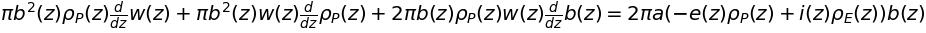

In [4]:
# Mass
eq1Adz = pi * b**2 * w *rho_P
eq1AR = 2*pi*b*a * (i*rho_E - e*rho_P)
eq1A = sp.Eq(eq1Adz.diff(z), eq1AR)
eq1A

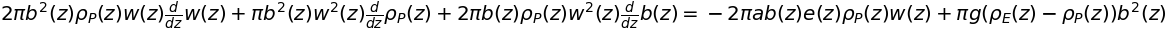

In [5]:
# Momentum
eq1Bdz = pi * b**2 * w**2 * rho_P
eq1BR = pi*b**2*g *(rho_E - rho_P) - 2*pi*b*w*rho_P*a*e
eq1B = sp.Eq(eq1Bdz.diff(z), eq1BR)
eq1B

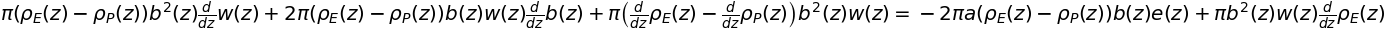

In [6]:
# Buoyancy
eq1Cdz = pi * b**2 * w * (rho_E - rho_P)
eq1CR = -2*pi*b*a*e*(rho_E - rho_P) + pi*b**2*w*rho_E.diff(z)
eq1C = sp.Eq(eq1Cdz.diff(z), eq1CR)
eq1C

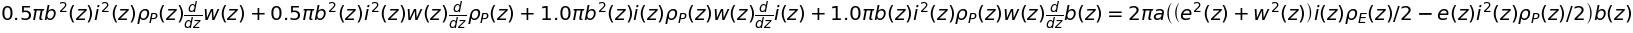

In [7]:
# Turbulent kinetic energy
eq1Ddz = pi * b**2 * w * (1/2* i**2 * rho_P)
eq1DR = 2*pi*b*a*(i/2*rho_E*(w**2 + e**2) - e/2*rho_P*i**2)
eq1D = sp.Eq(eq1Ddz.diff(z), eq1DR)
eq1D

In [8]:
# potential temp times potential density, theta_E*rho_E = const 
eqET = sp.Eq((theta_E*rho_E).diff(z), 0)


In [9]:
# solve to find all the recurrence relations
k = sp.solve([eq1A, eq1B, eq1C, eq1D], b.diff(z), w.diff(z), i.diff(z), rho_P.diff(z))
bdiff = k[b.diff(z)]
wdiff = k[w.diff(z)]
idiff = k[i.diff(z)]
rho_Pdiff = k[rho_P.diff(z)]
rho_Ediff = sp.solve(eqET, rho_E.diff(z))[0]


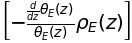

In [10]:
sp.solve(eqET, rho_E.diff(z))
#eqET, rho_E.diff(z)


In [11]:
theta_E0 = 15+273
plumetemp = 1
rho_Eval = 1
rho_Pval = (rho_Eval*theta_E0)/(plumetemp+theta_E0)
rho_Pval
alpha = 0.1
aval = 0.6**0.5*alpha
aval

In [12]:
ggp = {}  # record plume temp to shape

In [13]:
bval = 100   # radius of thermal
wval = 1.14     # upward velocity
# plume_excess = 1K
e_val = 0      # environmental turbulence
alpha = 0.1
aval = 0.6**0.5*alpha
s = 1
ival = s*alpha*wval/aval
zval = 0
dz = 3.8
gval = 9.81
rho_Pval, rho_Eval = 0.99, 1
theta_E0 = 15+273
plumetemp = 1
rho_Eval = 1.2
rho_Pval = (rho_Eval*theta_E0)/(plumetemp+theta_E0)
theta_Ediffval = 0.001*0
theta_Eval = theta_E0+z*theta_Ediffval  # the potential temperature gradient


In [14]:
# rerun this with different plumetemp values
def resetvals(lplumetemp, lbval):
    global zval, bval, wval, e_val, ival, rho_Pval, rho_Eval, theta_Eval, plumetemp
    bval = lbval   # radius of thermal
    wval = 1.14     # upward velocity
    # plume_excess = 1K
    e_val = 0      # environmental turbulence
    alpha = 0.1
    aval = 0.6**0.5*alpha
    s = 1
    ival = s*alpha*wval/aval
    zval = 0
    dz = 3.8
    gval = 9.81
    theta_E0 = 15+273
    plumetemp = lplumetemp
    rho_Eval = 1.2
    rho_Pval = (rho_Eval*theta_E0)/(plumetemp+theta_E0)
    theta_Ediffval = 0.001*0
    theta_Eval = theta_E0+z*theta_Ediffval  # the potential temperature gradient


In [15]:
#subsvals = {a:1000, g:gval, b:bval, w:wval, i:ival, rho_P:rho_Pval, e:e_val, rho_E:rho_Eval}
#idiff.subs(subsvals), e_val, ival
#eq1CR.subs(subsvals).doit()

In [16]:
#subsvals = {a:aval, g:gval, b:bval, w:wval, i:ival, rho_P:rho_Pval, e:e_val, rho_E:rho_Eval}
#bdiffval = bdiff.subs(subsvals)
#s, alpha, wval
#wdiffval = wdiff.subs(subsvals)
#wdiffval

In [17]:
def simz(lplumetemp, lbval, zvaltop):
    global zval, bval, wval, e_val, ival, rho_Pval, rho_Eval, theta_Eval, plumetemp
    resetvals(lplumetemp, lbval)
    zarr, barr, iarr, warr, rho_Parr, rho_Earr = [], [], [], [], [], []
    while zval < zvaltop:
        rho_Ediffval = rho_Ediff.subs({theta_E:theta_Eval, rho_E:rho_Eval, z:zval}).doit()

        subsvals = {a:aval, g:gval, b:bval, w:wval, i:ival, rho_P:rho_Pval, e:e_val, rho_E:rho_Eval}
        bdiffval = bdiff.subs(subsvals)
        idiffval = idiff.subs(subsvals)
        wdiffval = wdiff.subs(subsvals)
        rho_Pdiffval = rho_Pdiff.subs(subsvals)

        bval += bdiffval*dz
        ival += idiffval*dz
        wval += wdiffval*dz
        rho_Pval += rho_Pdiffval*dz
        rho_Eval += rho_Ediffval*dz
        zval += dz
        zarr.append(float(zval))
        barr.append(float(bval))
        iarr.append(float(ival))
        warr.append(float(wval))
        rho_Parr.append(float(rho_Pval))
        rho_Earr.append(float(rho_Eval))
        #print(zval)
    return zarr, barr, iarr, warr, rho_Parr, rho_Earr


In [46]:
# plot for changes in initial temperature
ggp = {}
for plumetemp in [0.2, 0.5, 1.0, 1.5]:
    lbval = 100
    print(plumetemp, lbval)
    ggp[plumetemp] = simz(plumetemp, lbval, 1500)


0.2 100
0.5 100
1.0 100
1.5 100


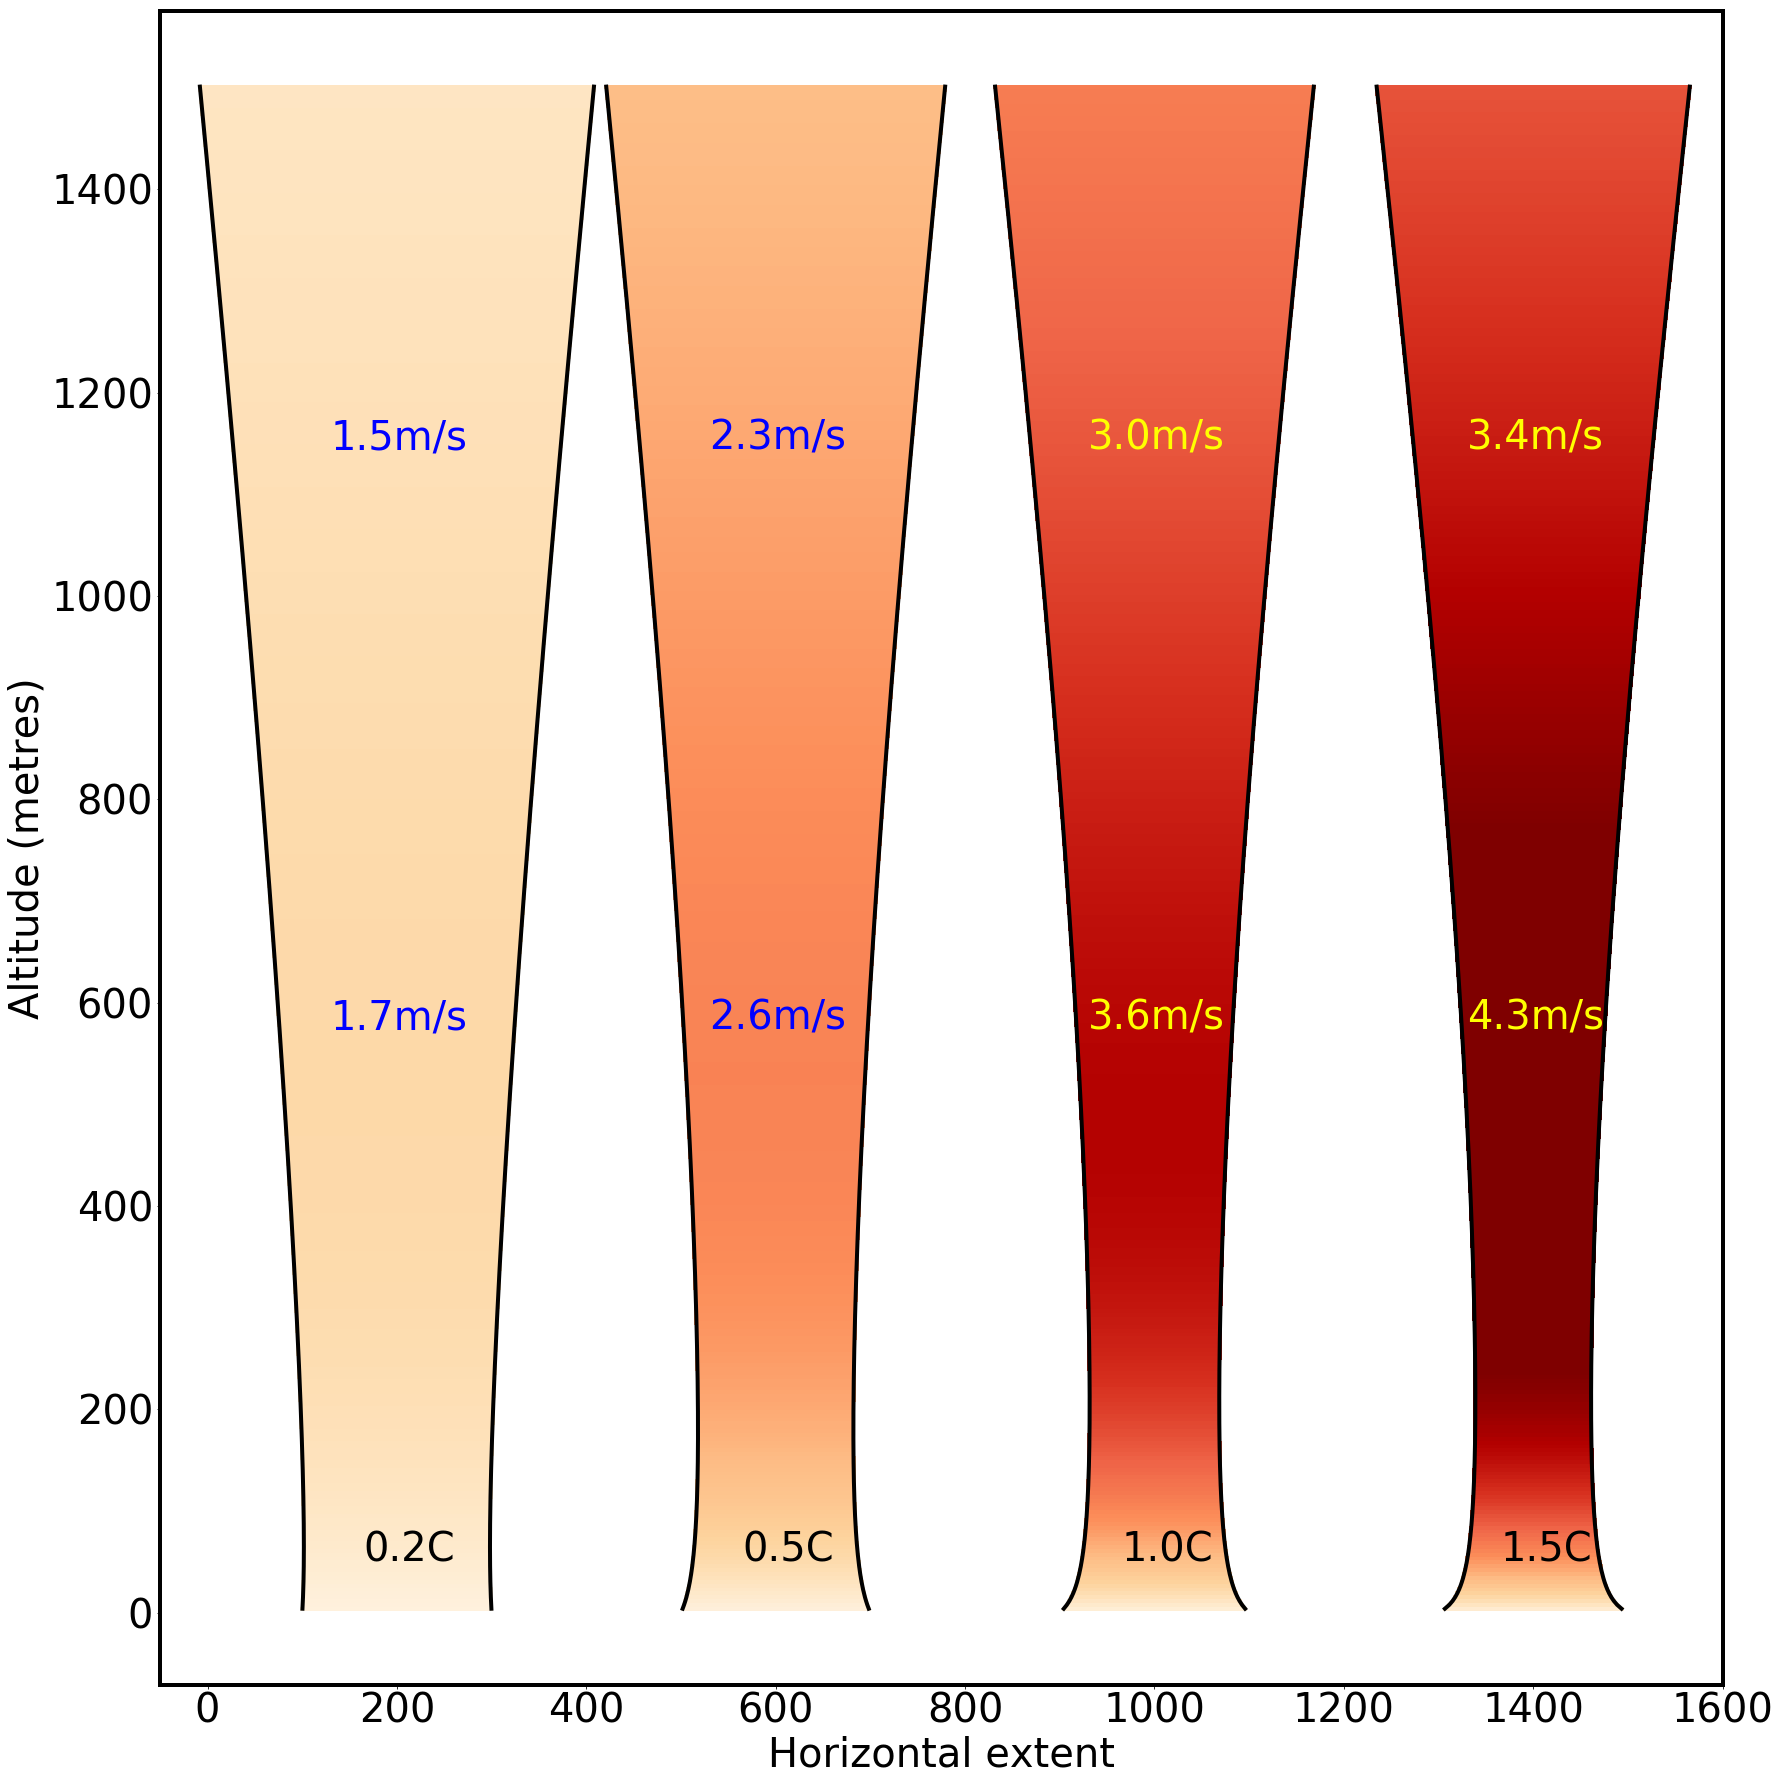

In [47]:
plumetemps = list(ggp.keys())
plumetemps = sorted(plumetemps)

fac = 4
plt.figure(figsize=(7*fac,7.7*fac))
matplotlib.rcParams.update({'font.size': fac*10})
matplotlib.rcParams.update({'axes.linewidth': fac*1})
plt.xlim([-50,400*len(plumetemps)])
cmap=plt.get_cmap("OrRd")
for kk, plumetemp in enumerate(plumetemps):
    [zarr, barr, iarr, warr, rho_Parr, rho_Earr] = ggp[plumetemp]
    xxd = kk*400+200
    for k in range(0, len(zarr), 1):
        c = cmap(float((warr[k]-1)/3))
        #c = (0.311211895833334, 0, 0.688788104166666, 1)
        plt.plot((xxd-barr[k],xxd+barr[k]), (zarr[k],zarr[k]), color=c, linewidth=fac)
    plt.plot([xxd+barr[k] for k in range(len(zarr))], zarr, color="black", linewidth=fac)
    plt.plot([xxd-barr[k] for k in range(len(zarr))], zarr, color="black", linewidth=fac)
    plt.text(xxd-70, zarr[150], "%.1fm/s"%warr[150], color="blue" if kk<2 else "yellow")
    plt.text(xxd-70, zarr[300], "%.1fm/s"%warr[300], color="blue" if kk<2 else "yellow")
    plt.text(xxd-35, 50, "%.1fC"%plumetemp)
plt.ylabel("Altitude (metres)")
plt.xlabel("Horizontal extent")
plt.savefig("plumestemp.svg", transparent=False)

In [44]:
# plot for changes in initial radius
ggp = {}
plumetemp = 1.0
for lbval in [20, 50, 100, 200]:
    print(plumetemp, lbval)
    ggp[lbval] = simz(plumetemp, lbval, 1500)


1.0 20
1.0 50
1.0 100
1.0 200


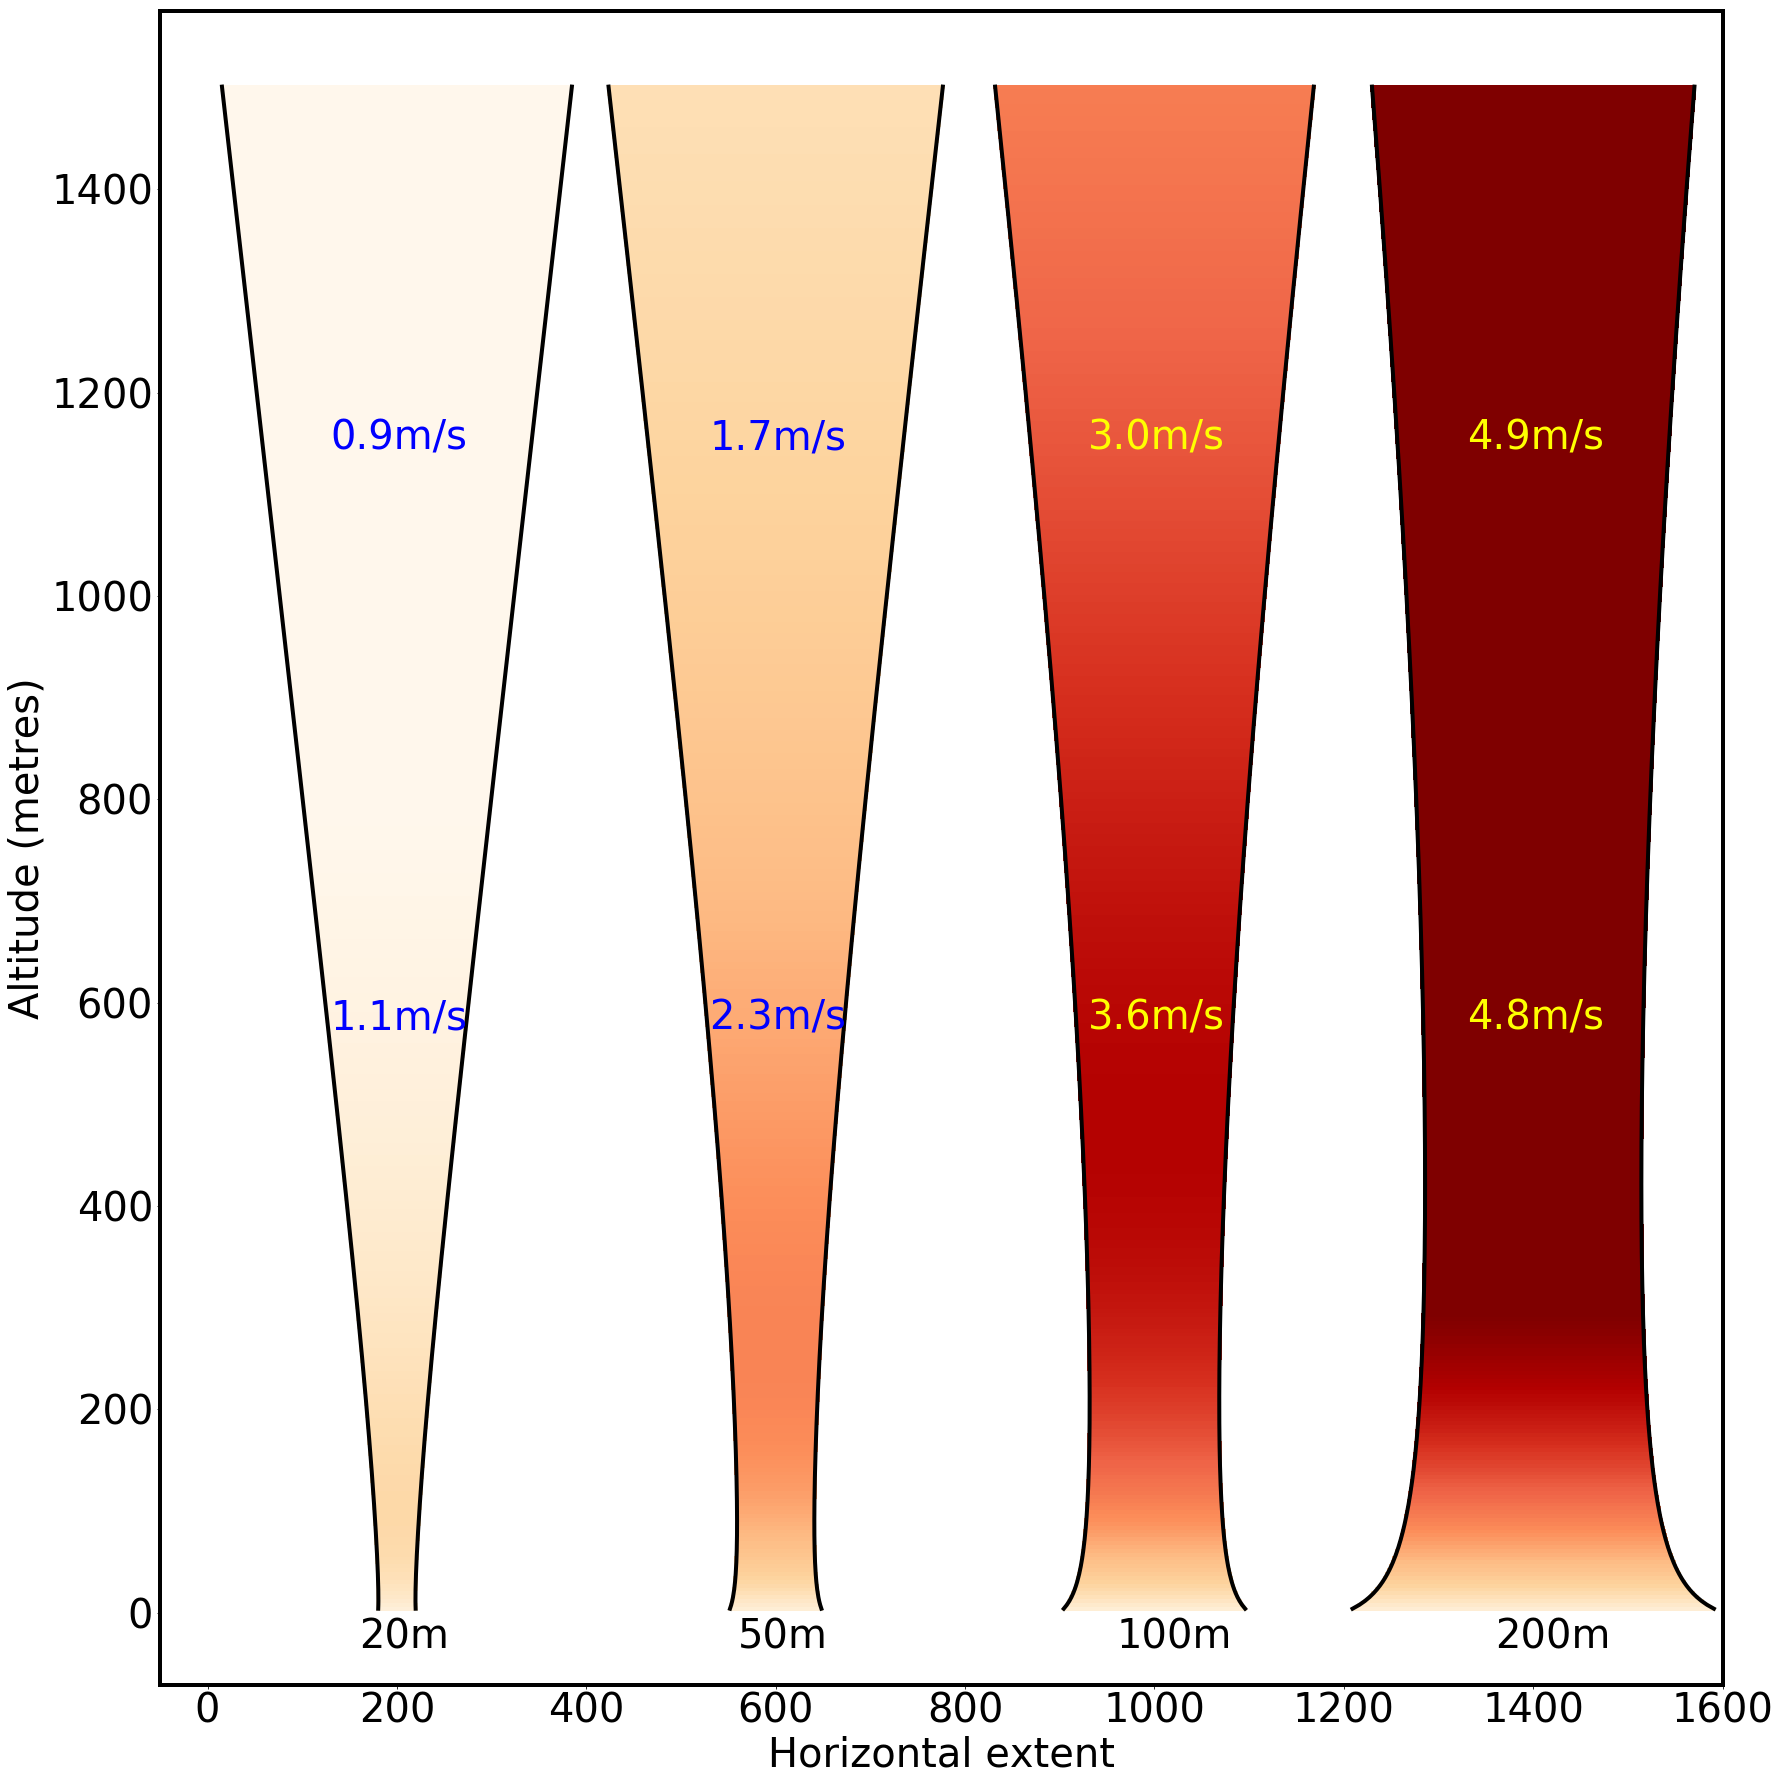

In [45]:
import matplotlib
plumetemps = list(ggp.keys())
plumetemps = sorted(plumetemps)

fac = 4
plt.figure(figsize=(7*fac,7.7*fac))
matplotlib.rcParams.update({'font.size': fac*10})
matplotlib.rcParams.update({'axes.linewidth': fac*1})
plt.xlim([-50,400*len(plumetemps)])
cmap=plt.get_cmap("OrRd")
for kk, plumetemp in enumerate(plumetemps):
    [zarr, barr, iarr, warr, rho_Parr, rho_Earr] = ggp[plumetemp]
    xxd = kk*400+200
    for k in range(0, len(zarr), 1):
        c = cmap(float((warr[k]-1)/3))
        #c = (0.311211895833334, 0, 0.688788104166666, 1)
        plt.plot((xxd-barr[k],xxd+barr[k]), (zarr[k],zarr[k]), color=c, linewidth=fac)
    plt.plot([xxd+barr[k] for k in range(len(zarr))], zarr, color="black", linewidth=fac)
    plt.plot([xxd-barr[k] for k in range(len(zarr))], zarr, color="black", linewidth=fac)
    plt.text(xxd-70, zarr[150], "%.1fm/s"%warr[150], color="blue" if kk<2 else "yellow")
    plt.text(xxd-70, zarr[300], "%.1fm/s"%warr[300], color="blue" if kk<2 else "yellow")
    plt.text(xxd-40, -35, "%dm"%plumetemp)
plt.ylabel("Altitude (metres)")
plt.xlabel("Horizontal extent")
plt.savefig("plumesrad.svg", transparent=False)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'ax

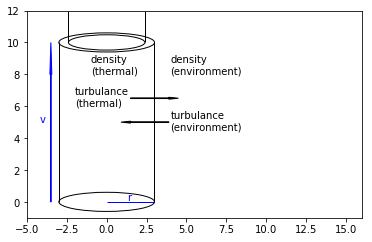

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

wl = 0.2
w = 6
h = 10
ax1.add_patch(patches.Ellipse((0,0),w,w*wl, fill=False))
ax1.add_patch(patches.Ellipse((0,h),w,w*wl, fill=False))
ax1.add_patch(patches.PathPatch(patches.Path(vertices=[(w/2,0),(w/2,h)])))
ax1.add_patch(patches.PathPatch(patches.Path(vertices=[(-w/2,0),(-w/2,h)])))

ax1.text(w/2-4,h*0.8,"density\n(thermal)")
ax1.text(w/2+1,h*0.8,"density\n(environment)")
ax1.text(w/2-5,h*0.6,"turbulance\n(thermal)")
ax1.add_patch(patches.Arrow(w/2-1.5,h*0.6+0.5,3,0, width=0.2, color="black"))
ax1.text(w/2+1,h*0.45,"turbulance\n(environment)")
ax1.add_patch(patches.Arrow(w/2+0.9,h*0.45+0.5,-3,0, width=0.2, color="black"))
ax1.set_ylim([-1,12])
ax1.set_xlim([-5,16])
ax1.add_patch(patches.PathPatch(patches.Path(vertices=[(0,0),(w/2,0)]), color="blue"))
ax1.text(w/4-0.2,0.1,"r", color="blue")
ax1.add_patch(patches.Arrow(-w/2-0.5,0,0,h, width=0.2, color="blue"))
ax1.text(-w/2-1.2,h/2,"v", color="blue")

w1 = w*0.8
ax1.add_patch(patches.Ellipse((0,h),w1,w1*wl, fill=False))
ax1.add_patch(patches.PathPatch(patches.Path(vertices=[(w1/2,h),(w1/2,h+2)])))
ax1.add_patch(patches.PathPatch(patches.Path(vertices=[(-w1/2,h),(-w1/2,h+2)])))
